In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./data/HR_Cleaned.csv")

In [23]:
df[['MarriedID', 'GenderID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences', 'EmploymentDuration', 'On_Location']].corrwith(df["Termd"]).sort_values(ascending=False)

FromDiversityJobFairID    0.147717
On_Location               0.144582
DaysLateLast30            0.136379
Absences                  0.098274
MarriedID                 0.077028
EmpSatisfaction          -0.004732
GenderID                 -0.015741
EngagementSurvey         -0.017543
PerfScoreID              -0.089061
Salary                   -0.093994
SpecialProjectsCount     -0.147429
EmploymentDuration       -0.851737
dtype: float64

In [19]:
df["Termd"].value_counts()

0    207
1    104
Name: Termd, dtype: int64

In [17]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'EmploymentDuration', 'On_Location'],
      dtype='object')

In [15]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
ManagerID   

In [29]:
correlation_matrix

,0
MarriedID,0.077028
GenderID,-0.015741
PerfScoreID,-0.089061
FromDiversityJobFairID,0.147717
Salary,-0.093994
EngagementSurvey,-0.017543
EmpSatisfaction,-0.004732
SpecialProjectsCount,-0.147429
DaysLateLast30,0.136379
Absences,0.098274


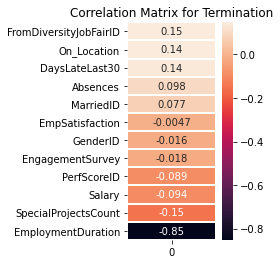

In [44]:
# Exploratory Data Analysis (EDA)
# Correlation Matrix
correlation_matrix = pd.DataFrame(df[['MarriedID', 'GenderID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences', 'EmploymentDuration', 'On_Location']].corrwith(df["Termd"])).sort_values(0,ascending=False)

# Transposing the matrix to get the correct shape
#correlation_matrix = correlation_matrix.transpose().sort_values(by=correlation_matrix.columns[0], ascending=False)


plt.figure(figsize=(2, 4))
sns.heatmap(correlation_matrix, annot=True, linewidths=1)
plt.title('Correlation Matrix for Termination');
#plt.show()

In [3]:
# Assigning weights to factors for churn risk
weights = {
    'PerfScoreID': -1,  # Lower performance might indicate higher churn risk
    'EmpSatisfaction': -1,  # Lower satisfaction might indicate higher churn risk
    'EngagementSurvey': -1,  # Lower engagement might indicate higher churn risk
    'Absences': 0.5,  # More absences might indicate higher churn risk
    'DaysLateLast30': 1,  # More days late might indicate higher churn risk
    'EmploymentDuration': -0.1  # Shorter duration might indicate higher churn risk
}

# Normalizing and calculating churn risk score
for factor, weight in weights.items():
    df[factor + '_norm'] = (df[factor] - df[factor].mean()) / df[factor].std()
df['ChurnRiskScore'] = sum([df[factor + '_norm'] * weight for factor in weights])



In [4]:
# Identifying high-risk individuals
high_risk_threshold = df['ChurnRiskScore'].quantile(0.95)
high_risk_individuals = df[df['ChurnRiskScore'] >= high_risk_threshold]

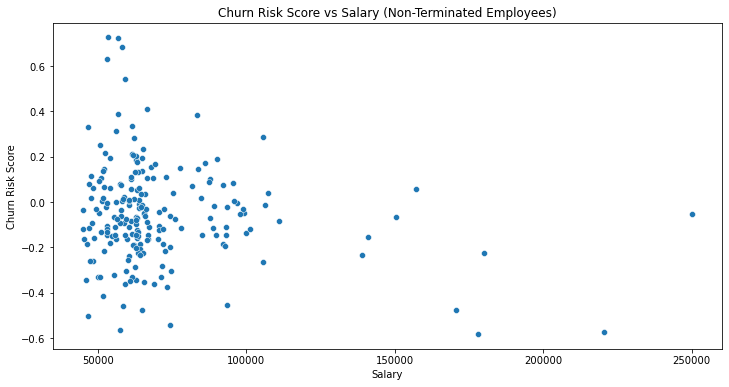

In [5]:
# Visualizing Churn Risk Score vs Salary for non-terminated employees
non_terminated_employees = df[df['EmploymentStatus'].str.contains('Active')]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_terminated_employees, x='Salary', y='ChurnRiskScore')
plt.title('Churn Risk Score vs Salary (Non-Terminated Employees)')
plt.xlabel('Salary')
plt.ylabel('Churn Risk Score')
plt.show()

In [7]:
high_risk_individuals[high_risk_individuals["EmploymentStatus"] == "Active_1"][['Employee_Name', 
       'Salary', 'Position', 'DOB', 'Sex',
       'HispanicLatino', 'RaceDesc', 'Department', 'ManagerName', 
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences', 'EmploymentDuration', 'ChurnRiskScore']].sort_values("ChurnRiskScore")

,Employee_Name,Salary,Position,DOB,Sex,HispanicLatino,RaceDesc,Department,ManagerName,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,EmploymentDuration,ChurnRiskScore
64,"Dee, Randy",56991,Production Technician I,04/15/88,M,No,White,Production,Brannon Miller,Fully Meets,4.30,4,3,2,2,1959,0.388395
23,"Blount, Dianna",66441,Production Technician II,09/21/90,F,No,White,Production,Michael Albert,Needs Improvement,2.00,3,0,2,3,4612,0.408757
72,"Dietrich, Jenna",59231,Area Sales Manager,05/14/87,F,Yes,White,Sales,John Smith,PIP,2.30,1,0,2,17,4290,0.545338
69,"Desimone, Carl",53189,Production Technician I,04/19/67,M,No,White,Production,Amy Dunn,PIP,1.12,2,0,4,9,3422,0.630192
267,"Stansfield, Norman",58273,Area Sales Manager,05/09/74,M,No,White,Sales,Lynn Daneault,PIP,1.81,2,0,3,5,3478,0.684356
83,"Erilus, Angela",56847,Production Technician II,08/25/89,F,No,White,Production,Michael Albert,PIP,3.00,1,0,2,5,3422,0.725023
91,"Fett, Boba",53366,Network Engineer,06/18/87,M,No,White,IT/IS,Peter Monroe,PIP,1.20,3,6,3,2,3156,0.726323


In [10]:
# Identifying high-risk individuals
high_risk_threshold = df['ChurnRiskScore'].quantile(0.95)
high_risk_individuals = df[df['ChurnRiskScore'] >= high_risk_threshold]

# Displaying a sample of high-risk individuals
high_risk_individuals[['Employee_Name', 'ChurnRiskScore'] + list(weights.keys())].sort_values(
    "ChurnRiskScore", ascending=False)

,Employee_Name,ChurnRiskScore,PerfScoreID,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,EmploymentDuration
91,"Fett, Boba",0.726323,1,3,1.20,2,3,3156
83,"Erilus, Angela",0.725023,1,1,3.00,5,2,3422
267,"Stansfield, Norman",0.684356,1,2,1.81,5,3,3478
137,"Immediato, Walter",0.675154,2,2,2.34,4,3,581
69,"Desimone, Carl",0.630192,1,2,1.12,9,4,3422
2,"Akinkuolie, Sarah",0.567351,3,3,3.02,3,0,447
205,"O'hare, Lynn",0.565700,1,2,2.33,3,6,1492
112,"Gonzalez, Juan",0.562704,1,3,3.00,10,3,399
72,"Dietrich, Jenna",0.545338,1,1,2.30,17,2,4290
132,"Howard, Estelle",0.516593,3,3,3.24,6,0,58


In [11]:
df[df['EmploymentStatus'].str.contains('Active')]['ChurnRiskScore']

0     -0.285645
3     -0.477826
5     -0.561790
6      0.083793
7     -0.303901
         ...   
305    0.010609
306   -0.063244
308   -0.574812
309   -0.017433
310   -0.033587
Name: ChurnRiskScore, Length: 207, dtype: float64

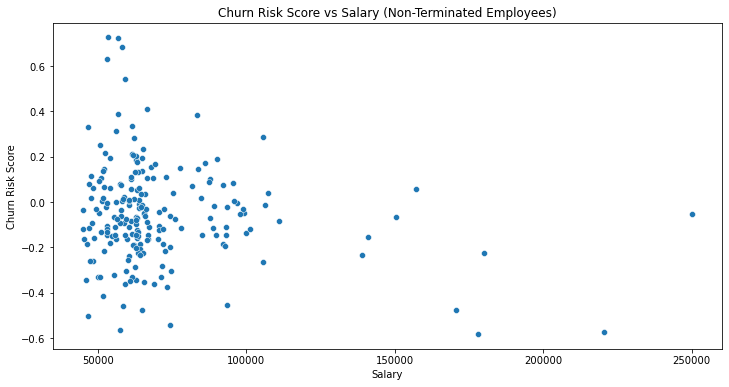

In [12]:
# Scatter plot to compare Churn Risk Score with Salary
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['EmploymentStatus'].str.contains('Active')], x='Salary', y='ChurnRiskScore')
plt.title('Churn Risk Score vs Salary (Non-Terminated Employees)')
plt.xlabel('Salary')
plt.ylabel('Churn Risk Score')
plt.show()
